In [1]:
# Load the data
import csv
import numpy as np
from pprint import pprint
import os

path = os.listdir("./data")[0]
with open(f"./data/{path}") as fin:
    reader = csv.reader(fin, delimiter=",")
    raw_data = list(reader)

    def convert(raw_data):
        return np.nan if raw_data == "" else int(raw_data)

    data = []
    for row in raw_data[1:]:
        data.append([])
        for col in range(3, len(raw_data[0]) - 2):
            data[-1].append(convert(row[col]))
    
    mat = np.array(data)

print(mat, mat.shape)

[[nan nan nan ...  7. nan nan]
 [ 7.  5. nan ...  1.  3.  1.]
 [ 5.  2. nan ...  4.  6.  3.]
 ...
 [ 4.  1.  1. ...  7.  3.  2.]
 [ 2.  2. nan ... nan nan nan]
 [ 3.  6. nan ...  4. nan nan]] (65, 50)


In [2]:
# Get food labels
import re

pattern = r".*?\[(.*)].*"
people_labels = [row[2] for row in raw_data[1:]]

In [3]:
# Clean up the data a little
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

mean = np.nanmean(mat)
n_foods, n_people = mat.shape

print(f"Mean of nonzero entries: {mean}")
print(f"Count of nonzero entries: {np.count_nonzero(~np.isnan(data))}")

# Fancy matrix completion
# https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html
imp_mean = SimpleImputer(missing_values=np.nan, strategy="mean")
imp_mean.fit(mat)
mat = imp_mean.transform(mat)

# Standardize features?
def fit_rows(mat):
    return StandardScaler().fit_transform(mat)

def fit_cols(mat):
    return StandardScaler().fit_transform(mat.T).T


for i in range(1):
    mat = fit_rows(mat)
    mat = fit_cols(mat)

np.set_printoptions(threshold=np.inf)

for row in mat.T[:10]:
    print(np.mean(row), np.var(row))

Mean of nonzero entries: 4.448205128205128
Count of nonzero entries: 2925
0.03876366170273596 1.3821570824838048
-0.009901140834627517 1.1370230254432714
0.013343637184734096 0.8552882100294872
0.01738897046159958 1.1775001111821648
0.005845867096294106 1.2030676124379596
0.02093509264445208 0.9653325894081334
0.020821209631362247 0.7181103819657781
2.99111568479769e-05 1.1506870947571146
-0.03434017524714026 1.0059932299833194
0.004475945453693097 0.6255046711891901


In [4]:
# Let's do some PCA!
from sklearn.decomposition import PCA
pca_2d = PCA(n_components=2)
pca_3d = PCA(n_components=3)

pc_2 = pca_2d.fit_transform(mat)
pc_3 = pca_3d.fit_transform(mat)

6

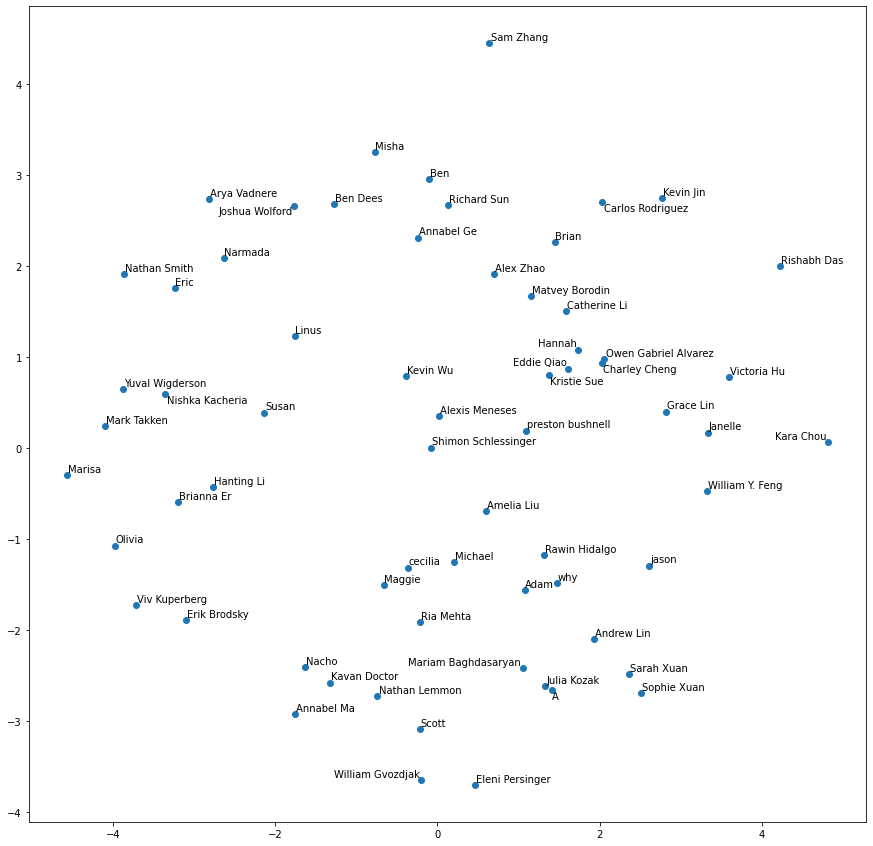

In [5]:
from matplotlib import pyplot as plt
from adjustText import adjust_text

fig = plt.figure(figsize=(15, 15))

#plot_3d = fig.add_subplot(2, 2, 1, projection="3d")
#plot_3d.scatter(*pc_3.T)

plot_2d = fig.add_subplot()
plot_2d.scatter(*pc_2.T)

labels = []
for food, coords in zip(people_labels, pc_2):
    labels.append(plt.text(coords[0], coords[1], food, ha="center", va="center"))

adjust_text(labels)